This notebook demonstrates various visualization techniques to better understand the structure and properties of seismic or synthetic signals. Clear visualization is essential in geophysics for identifying trends, anomalies, and noise in waveforms.  
**Objective**
To explore multiple methods of visualizing a 1D time-series signal (sine wave with added noise) using:

Line Plot (Time Series)  
Histogram  
Heatmap  
Spectrogram  

In [3]:
#Setting up using previous sine wave
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Synthetic signal (same sine wave as before)
fs = 100  # Sampling frequency (Hz)
t = np.linspace(0, 1, fs, endpoint=False)  # 1 second of data
freq = 5  # Hz
signal = np.sin(2 * np.pi * freq * t)

# Optional: add some noise
noisy_signal = signal + 0.4 * np.random.normal(size=fs)


**Time Series Plot**
This plot shows how the signal evolves over time. It's ideal for:

Viewing waveform shape  
Spotting periodicity or spikes  
Comparing raw vs. filtered signals

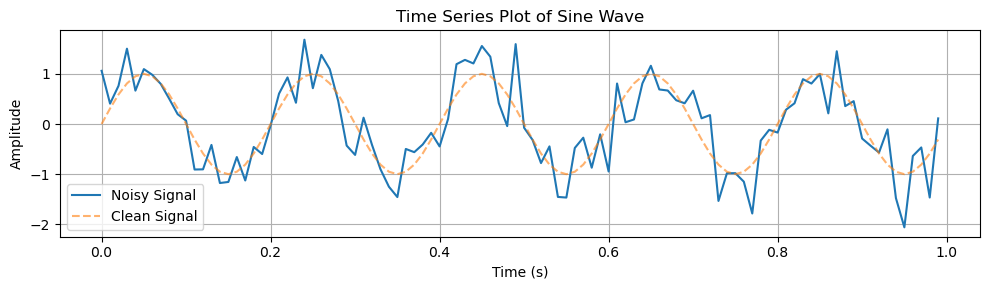

In [6]:
plt.figure(figsize=(10, 3))
plt.plot(t, noisy_signal, label='Noisy Signal')
plt.plot(t, signal, label='Clean Signal', linestyle='--', alpha=0.6)
plt.title("Time Series Plot of Sine Wave")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


**Histogram**
The histogram reveals the distribution of amplitude values, showing:

Central tendency  
Variability  
Outliers It’s useful for understanding the intensity range of seismic waveforms.

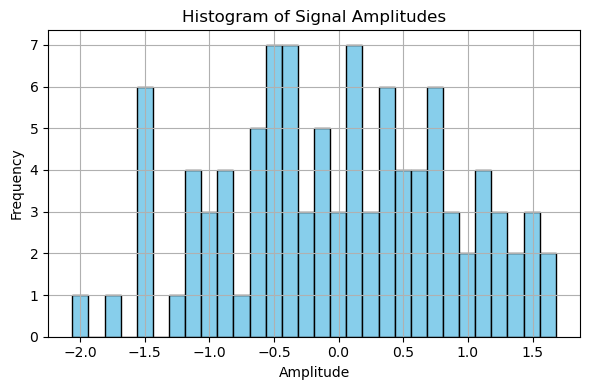

In [9]:
plt.figure(figsize=(6, 4))
plt.hist(noisy_signal, bins=30, color='skyblue', edgecolor='black')
plt.title("Histogram of Signal Amplitudes")
plt.xlabel("Amplitude")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()


**Heatmap**
By reshaping the 1D signal into a 2D matrix, we visualize amplitude patterns spatially. This isn’t common in raw waveform analysis but helps:

Spot dense high-energy areas  
Compare sections quickly

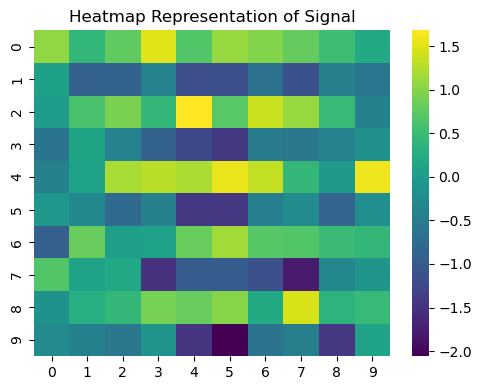

In [12]:
# Reshape signal into 10x10 "image" (just for heatmap demo)
reshaped = noisy_signal.reshape(10, 10)

plt.figure(figsize=(5, 4))
sns.heatmap(reshaped, cmap="viridis", annot=False, cbar=True)
plt.title("Heatmap Representation of Signal")
plt.tight_layout()
plt.show()

**Spectrogram**
The spectrogram shows how frequencies change over time. It’s highly valuable in seismic analysis for:

Detecting sudden frequency shifts (e.g., earthquakes)  
Visualizing noise bursts  
Understanding complex frequency content

C:\Users\saijy\AppData\Local\Temp\ipykernel_6804\2647228663.py:2: UserWarning: Only one segment is calculated since parameter NFFT (=256) >= signal length (=100).
  plt.specgram(noisy_signal, Fs=fs, cmap='magma')


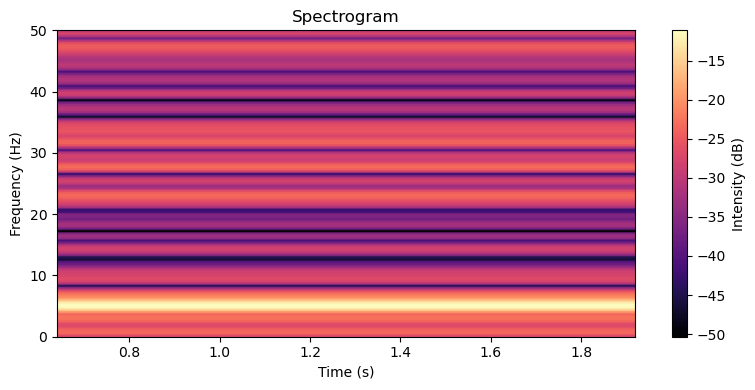

In [16]:
plt.figure(figsize=(8, 4))
plt.specgram(noisy_signal, Fs=fs, cmap='magma')
plt.title("Spectrogram")
plt.xlabel("Time (s)")
plt.ylabel("Frequency (Hz)")
plt.colorbar(label='Intensity (dB)')
plt.tight_layout()
plt.show()


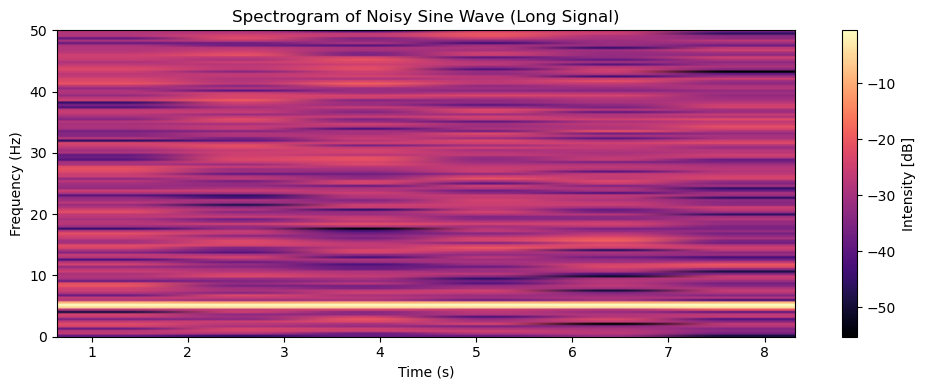

In [20]:
#**using a longer signal for better time-frequency resolution**
import numpy as np
import matplotlib.pyplot as plt

# 1. Simulate a longer noisy sine wave
fs = 100  # Sampling frequency in Hz
t = np.linspace(0, 10, 10 * fs, endpoint=False)  # 10 seconds, 1000 samples
signal = np.sin(2 * np.pi * 5 * t)  # 5 Hz sine wave
noisy_signal = signal + 0.3 * np.random.randn(len(t))  # Add noise

# 2. Plot Spectrogram
plt.figure(figsize=(10, 4))
plt.specgram(noisy_signal, Fs=fs, cmap='magma')  # Default NFFT=256
plt.title("Spectrogram of Noisy Sine Wave (Long Signal)")
plt.xlabel("Time (s)")
plt.ylabel("Frequency (Hz)")
plt.colorbar(label='Intensity [dB]')
plt.tight_layout()
plt.show()


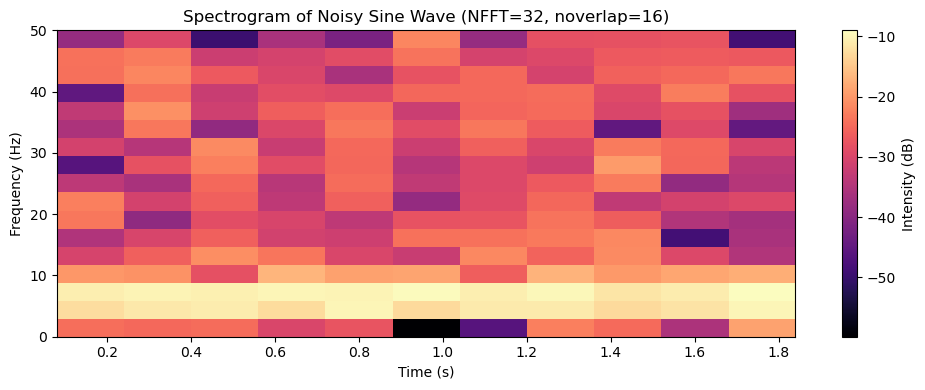

In [26]:
#**Keeping the original short signal but reducing NFFT(window size) from default=256**
import numpy as np
import matplotlib.pyplot as plt

# 1. Simulate short sine wave
fs = 100  # Sampling frequency in Hz
t = np.linspace(0, 2, 2 * fs, endpoint=False)  # 2 seconds, 200 samples
signal = np.sin(2 * np.pi * 5 * t)  # 5 Hz sine wave
noisy_signal = signal + 0.3 * np.random.randn(len(t))

# 2. Plotting Spectrogram with smaller window
# Spectrogram with correct NFFT and noverlap(how much each window overlaps)
plt.figure(figsize=(10, 4))
plt.specgram(noisy_signal, Fs=fs, NFFT=32, noverlap=16, cmap='magma')
plt.title("Spectrogram of Noisy Sine Wave (NFFT=32, noverlap=16)")
plt.xlabel("Time (s)")
plt.ylabel("Frequency (Hz)")
plt.colorbar(label='Intensity (dB)')
plt.tight_layout()
plt.show()